<a href="https://colab.research.google.com/github/sheteshravani/INTERNSHIP/blob/master/Internship_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas

**LOADING THE DATASET **

In [3]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
df = pd.read_csv('/content/drive/MyDrive/Internship/Data analyst Data - Data analyst Data (1).csv')

Basic Question 1:How many unique students are included in the dataset?

We find that there are 4894 unique students. **bold text**


In [7]:
unique_students = df[['First Name', 'Email ID']]
print(f'The number of unique students in the dataset is {unique_students}.')


The number of unique students in the dataset is         First Name              Email ID
0           ANIKET        aniket@xyz.com
1        Dhanshree     dhanshree@xyz.com
2           Dhiraj        dhiraj@xyz.com
3            Pooja         pooja@xyz.com
4           Aayush        aayush@xyz.com
...            ...                   ...
4889   Patel Niraj    patelniraj@xyz.com
4890         VIDIT         vidit@xyz.com
4891  Suryaprakash  suryaprakash@xyz.com
4892      Saif ali       saifali@xyz.com
4893       Lankesh       lankesh@xyz.com

[4894 rows x 2 columns].


**2.What is the average gpa of the student?**

In [8]:
average_gpa = df['CGPA'].mean()
print(f'The average GPA of the students is {average_gpa:.2f}.')


The average GPA of the students is 8.04.


**3.What is the distribution of students across different graduation years?**

In [9]:
graduation_year_distribution = df['Year of Graduation'].value_counts()
print(graduation_year_distribution)


2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


**4.What is the distribution of students'experience with Python Programming?**

In [10]:

python_programming_distribution = df['Experience with python (Months)'].value_counts()
print(python_programming_distribution)


5    1242
3    1008
8     800
6     738
7     640
4     466
Name: Experience with python (Months), dtype: int64


**6.How does GPA vary among different colleges?(Show top five results only)**

In [11]:
# Group the data by 'college' and calculate the mean GPA for each college
college_gpa_mean = df.groupby('College Name')['CGPA'].mean()

# Sort the colleges by mean GPA in descending order and take the top five
top_five_colleges = college_gpa_mean.sort_values(ascending=False).head(5)

# Display the top five colleges and their mean GPAs
print(top_five_colleges)


College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


**5.What is the average family income of the students?**

In [12]:

# Split the income range into 'min_income' and 'max_income'
df[['min_income', 'max_income']] = df['Family Income'].str.split('-', expand=True)

# Convert the income columns to numeric values, extracting the numeric part and handling 'Lakh' or 'Crore' values
df['min_income'] = df['min_income'].str.extract(r'(\d+\.*\d*)')[0].astype(float)
df['max_income'] = df['max_income'].str.extract(r'(\d+\.*\d*)')[0].astype(float)

# Calculate the midpoint income
df['midpoint_income'] = (df['min_income'] + df['max_income']) / 2

# Calculate the average family income
average_family_income = df['midpoint_income'].mean()
print(f'The average family income of the students is Rs {average_family_income:.2f} lakh.')


The average family income of the students is Rs 1.68 lakh.


**8.What is the average gpa for students from each city?**

In [13]:
# Assuming your dataset is stored in a DataFrame named 'df' and the columns are named 'city' and 'GPA'
# Replace with the actual column names in your dataset

# Group the data by 'city' and calculate the mean GPA for each city
city_gpa_mean = df.groupby('City')['CGPA'].mean()

# Display the average GPA for each city
print("Average GPA for students from each city:")
print(city_gpa_mean)


Average GPA for students from each city:
City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


**9.Can we identify any relatioship bretween family income and GPA?**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have columns 'Family Income' and 'CGPA' in your DataFrame 'df'
# Replace with the actual column names in your dataset

# Data Cleaning and Preprocessing
df['Family Income'] = df['Family Income'].str.replace(',', '').str.replace('$', '')

# Function to convert income values with units (e.g., '50 Lakh' to 500,000)
def convert_income_with_units(income_value):
    parts = income_value.split()
    if 'Lakh' in parts:
        # Convert Lakh to numeric value
        numeric_value = float(parts[0])
        return numeric_value * 100000  # Convert Lakh to numeric value
    elif 'Crore' in parts:
        # Convert Crore to numeric value
        numeric_value = float(parts[0])
        return numeric_value * 10000000  # Convert Crore to numeric value
    else:
        return float(income_value)

# Function to calculate the midpoint income for income ranges (e.g., '7-50 Lakh' to 28.5 Lakh)
def calculate_midpoint_income(income_range):
    if '-' in income_range:
        min_income, max_income = map(float, income_range.split('-'))
        midpoint


<ipython-input-14-326f1e7799d8>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Family Income'] = df['Family Income'].str.replace(',', '').str.replace('$', '')


Correlation Coefficient: 0.02


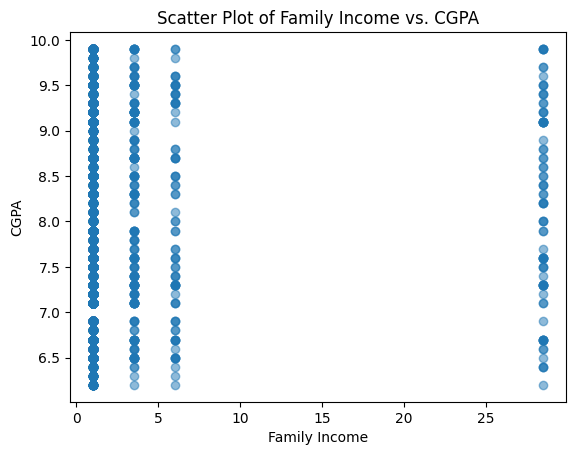

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have columns 'Family Income' and 'CGPA' in your DataFrame 'df'
# Replace with the actual column names in your dataset

# Data Cleaning and Preprocessing
df['Family Income'] = df['Family Income'].str.replace(',', '').str.replace(' Lakh', '')

# Function to calculate the midpoint income for income ranges (e.g., '0-2 Lakh' to 1.0 Lakh)
def calculate_midpoint_income(income_range):
    min_income, max_income = map(float, income_range.split('-'))
    midpoint_income = (min_income + max_income) / 2
    return midpoint_income

# Apply the calculate_midpoint_income function to the 'Family Income' column
df['Family Income'] = df['Family Income'].apply(calculate_midpoint_income)

# Calculate the correlation coefficient
correlation_coefficient = df['Family Income'].corr(df['CGPA'])

# Create a scatter plot
plt.scatter(df['Family Income'], df['CGPA'], alpha=0.5)
plt.title('Scatter Plot of Family Income vs. CGPA')
plt.xlabel('Family Income')
plt.ylabel('CGPA')

# Print the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Show the plot
plt.show()


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

**MODERATE QUESTIONS:2. How does the expected salary vary based on factors like 'GPA' 'Family Income'  'Experience with python'**

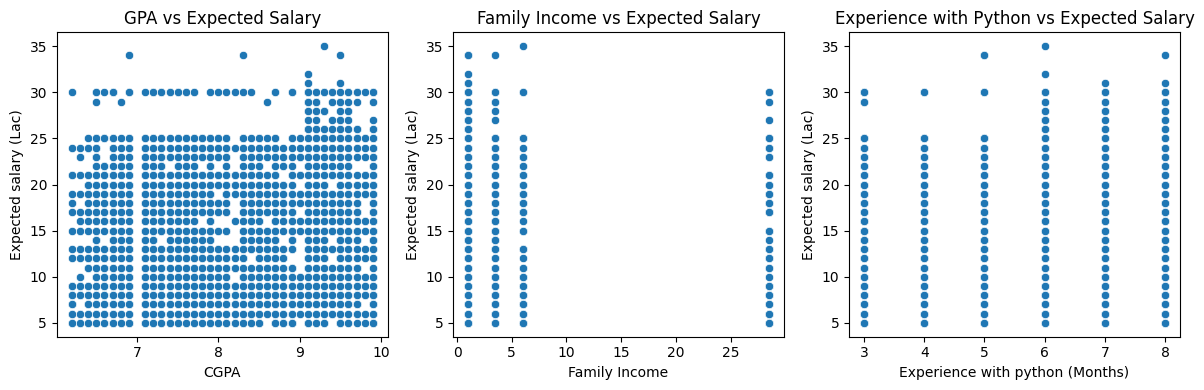

In [17]:
# Create scatter plots to visualize the relationships
plt.figure(figsize=(12, 4))

# Scatter plot: GPA vs Expected Salary
plt.subplot(131)
sns.scatterplot(data=df, x='CGPA', y='Expected salary (Lac)')
plt.title('GPA vs Expected Salary')

# Scatter plot: Family Income vs Expected Salary
plt.subplot(132)
sns.scatterplot(data=df, x='Family Income', y='Expected salary (Lac)')
plt.title('Family Income vs Expected Salary')

# Scatter plot: Experience with Python vs Expected Salary
plt.subplot(133)
sns.scatterplot(data=df, x='Experience with python (Months)', y='Expected salary (Lac)')
plt.title('Experience with Python vs Expected Salary')

# Show the plots
plt.tight_layout()
plt.show()

In [18]:
import scipy.stats as stats

**13.Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?**

In [19]:
# Split the dataset into two groups: Leadership and No Leadership
leadership_group = df[df['Leadership- skills'] == 'yes']
no_leadership_group = df[df['Leadership- skills'] == 'no']

# Calculate the mean GPA for each group
mean_gpa_leadership = leadership_group['CGPA'].mean()
mean_gpa_no_leadership = no_leadership_group['CGPA'].mean()

# Perform a t-test to compare the GPAs of the two groups
t_stat, p_value = stats.ttest_ind(leadership_group['CGPA'], no_leadership_group['CGPA'])

# Print the results
print(f'Mean GPA for Leadership: {mean_gpa_leadership:.2f}')
print(f'Mean GPA for No Leadership: {mean_gpa_no_leadership:.2f}')
print(f'T-test p-value: {p_value:.4f}')

# Interpret the results (check if p-value is significant)
if p_value < 0.05:
    print('There is a significant difference in GPA between the two groups.')
else:
    print('There is no significant difference in GPA between the two groups.')

Mean GPA for Leadership: 8.04
Mean GPA for No Leadership: 8.04
T-test p-value: 0.9338
There is no significant difference in GPA between the two groups.


In [20]:
# Split the dataset into two groups: Leadership and No Leadership
leadership_group = df[df['Leadership- skills'] == 'yes']
no_leadership_group = df[df['Leadership- skills'] == 'no']

# Calculate the mean GPA for each group
mean_gpa_leadership = leadership_group['Expected salary (Lac)'].mean()
mean_gpa_no_leadership = no_leadership_group['Expected salary (Lac)'].mean()

# Perform a t-test to compare the GPAs of the two groups
t_stat, p_value = stats.ttest_ind(leadership_group['Expected salary (Lac)'], no_leadership_group['Expected salary (Lac)'])

# Print the results
print(f'Mean Expected salary (Lac) for Leadership: {mean_gpa_leadership:.2f}')
print(f'Mean Expected salary (Lac) for No Leadership: {mean_gpa_no_leadership:.2f}')
print(f'T-test p-value: {p_value:.4f}')

# Interpret the results (check if p-value is significant)
if p_value < 0.05:
    print('There is a significant difference in GPA between the two groups.')
else:
    print('There is no significant difference in GPA between the two groups.')

Mean Expected salary (Lac) for Leadership: 13.97
Mean Expected salary (Lac) for No Leadership: 13.92
T-test p-value: 0.7817
There is no significant difference in GPA between the two groups.


**14.How many students are graduating by the end of 2024?**

In [21]:
# Filter students who are expected to graduate by the end of 2024
graduating_students_2024 = df[df['Year of Graduation'] <= 2024]

# Count the number of graduating students
num_graduating_students_2024 = len(graduating_students_2024)

# Print the result
print(f'Number of students graduating by the end of 2024: {num_graduating_students_2024}')

Number of students graduating by the end of 2024: 3047


**15.Which promotion channel brings in more student participants for the event?**

In [22]:
# Count the occurrences of each promotion channel
channel_counts = df['How did you come to know about this event?'].value_counts()

# Find the promotion channel with the highest count (most entries)
most_attended_channel = channel_counts.idxmax()

# Print the name of the promotion channel with the highest count
print(f'The promotion channel with the most participants is: {most_attended_channel}')

The promotion channel with the most participants is: Whatsapp


**16.Find the total no. of students who attended the events related to Data Science ?(from all data science related events)**

In [23]:
# Define the list of Data Science-related event names
data_science_events = ['Data Visualization using BI', 'IS DATA SCIENCE FOR YOU?']

# Filter events that are related to Data Science
data_science_events_df = df[df['Events'].isin(data_science_events)]

# Count the occurrences of Data Science-related events
total_data_science_events = len(data_science_events_df)

# Print the result
print(f'Total number of Data Science-related events: {total_data_science_events}')

Total number of Data Science-related events: 306


**17.Those who have high CGPA, more experience with python and high salary expectation**

In [24]:
column_name = 'Experience with python (Months)'

# Use the unique() method to list unique values in the specified column
unique_values = df[column_name].unique()

# Print the unique values
print(f'Unique values in the "{column_name}" column:')
for value in unique_values:
    print(value)

Unique values in the "Experience with python (Months)" column:
7
3
4
5
6
8


In [25]:
# Specify the column you want to list unique values from
column_name = 'CGPA'

# Use the unique() method to list unique values in the specified column
unique_values = df[column_name].unique()

# Print the unique values
print(f'Unique values in the "{column_name}" column:')
for value in unique_values:
    print(value)

Unique values in the "CGPA" column:
6.7
8.2
6.5
8.7
9.1
8.9
7.4
7.3
8.6
9.2
7.8
7.9
9.9
8.1
9.5
9.8
9.6
6.2
7.2
6.8
8.4
6.6
8.3
6.3
8.5
8.8
7.5
6.4
7.6
6.9
9.0
9.3
9.4
7.7
7.1
8.0
9.7


In [26]:
# Specify the column you want to list unique values from
column_name = 'Expected salary (Lac)'

# Use the unique() method to list unique values in the specified column
unique_values = df[column_name].unique()

# Print the unique values
print(f'Unique values in the "{column_name}" column:')
for value in unique_values:
    print(value)

Unique values in the "Expected salary (Lac)" column:
6
7
8
10
11
20
5
9
21
13
15
14
16
19
17
18
23
25
22
12
24
30
28
26
29
27
32
34
31
35


In [27]:
high_cgpa_threshold = 8.0  # Adjust as needed
high_experience_threshold = 5  # Adjust as needed
high_salary_threshold = 20  # Adjust as needed

# Filter students who meet the criteria
filtered_students = df[(df['CGPA'] >= high_cgpa_threshold) &
                       (df['Experience with python (Months)'] >= high_experience_threshold) &
                       (df['Expected salary (Lac)'] >= high_salary_threshold)]

# Calculate the average CGPA of students who meet the criteria
average_cgpa_high_experience_high_salary = filtered_students['CGPA'].mean()

# Print the result
print(f'Average CGPA of students with high CGPA, high experience, and high salary expectation: {average_cgpa_high_experience_high_salary:.2f}')

Average CGPA of students with high CGPA, high experience, and high salary expectation: 9.12


**18 How many students know about the event from their college?**

In [28]:
# Replace 'ColumnA' with the name of the column you want to count
column_name = 'Specify in "Others" (how did you come to know about this event)'

# Count the entries in the specified column
entry_count = df[column_name].count()

print(f"Number of entries in '{column_name}': {entry_count}")

Number of entries in 'Specify in "Others" (how did you come to know about this event)': 89
